<a href="https://colab.research.google.com/github/Animesh1911/Cardiovascular_Disease_Prediction/blob/main/Cardiovascular_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJECT NAME** - *Cardiovascular Disease Prediction*

The aim of this project is to predict whether a person has cardiovascular disease or not based on various features.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning Projects/Cardiovascular Disease Prediction/cardio_train.csv',delimiter=';')

##**PREPROCESSING AND EXPLORATORY DATA ANALYSIS**

In [3]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


**Independent Features:**

>Age (in days), Gender (1-Female, 2-Male), Height, Weight, Systolic BP, Diastolic BP,

>Cholesterol -  1 normal, 2 above normal, 3 well above normal

>Glucose - 1 normal, 2 above normal, 3 well above normal

>Smoking, Alcohol intake, Physical activity

**Dependent/Output Feature:**

>Cardiovascular Disease

In [4]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Average age of people is 53.

Percentage of male is 35.

Percentage of smoker is 9.

Percentage of alcoholic is 5.

Percentage of active people is 80.

We can see that there are various outliers in **'ap_hi'** and **'ap_lo'** columns since the  standard deviation value is too high. We can also see that the maximum and minimum values in these two columns are too high and negative respectively which is not possible for any Blood Pressure value.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


There are no missing values in the data.

In [6]:
data.drop('id',axis=1,inplace=True)

In [7]:
data['age'] = round(data['age']//365.25)

Converting the age values from days to years.

In [8]:
data['gender'] = data['gender'] - 1

Female - 0, 
Male - 1

In [9]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,51,0,165,64.0,130,70,3,1,0,0,0,1
3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,47,0,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,1,168,76.0,120,80,1,1,1,0,1,0
69996,61,0,158,126.0,140,90,2,2,0,0,1,1
69997,52,1,183,105.0,180,90,3,1,0,1,0,1
69998,61,0,163,72.0,135,80,1,2,0,0,0,1


In [10]:
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022762,-0.081373,0.053567,0.020932,0.017553,0.153998,0.098529,-0.047479,-0.029674,-0.009803,0.237949
gender,-0.022762,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081373,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053567,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020932,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017553,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.153998,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098529,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047479,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029674,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


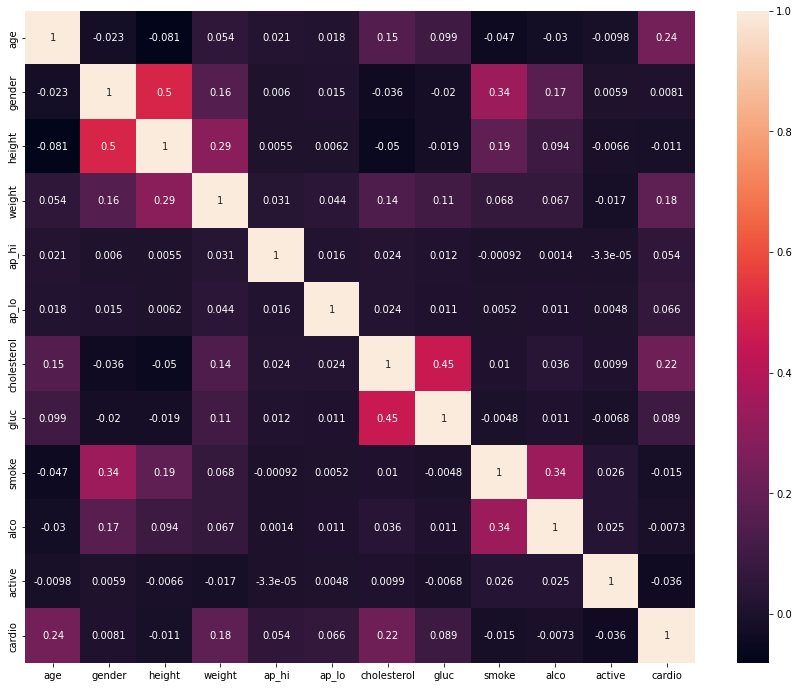

In [11]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)

The main causes of cardiovascular disease are **high blood pressure, overweight, smoking and cholestrol.**

From this correlation graph we can see **that only age, weight and cholestrol are having some impact on the output variable. Also, blood pressure is not having any importance on the output.** This is due to the pressence of outliers.

We also know that cholestrol and glucose have 3 different levels. So we should also try to figure out which level affects the output the most.

In [12]:
data['cholesterol'] = data['cholesterol'].map({1:"chol_1",2:"chol_2",3:"chol_3"})

data['gluc'] = data['gluc'].map({1:"gluc_1",2:"gluc_2",3:"gluc_3"})

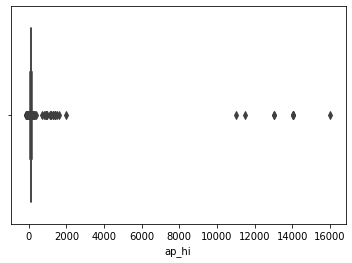

In [13]:
sns.boxplot(x=data['ap_hi'])

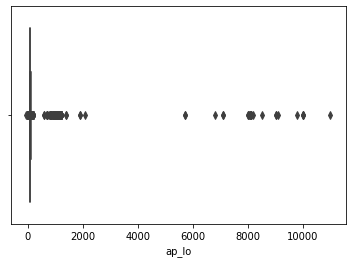

In [14]:
sns.boxplot(x=data['ap_lo'])

We are going to remove the outliers in **ap_hi** and **ap_lo** as these values are not measured correctly and can impact the performance of our model.



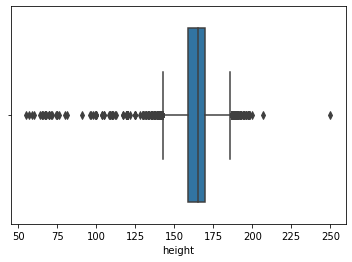

In [15]:
sns.boxplot(x=data['height'])

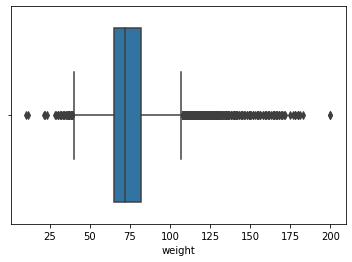

In [16]:
sns.boxplot(x=data['weight'])

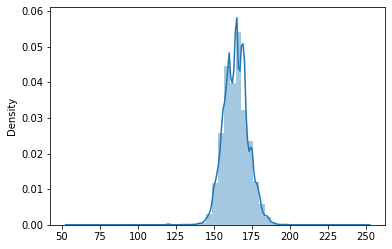

In [17]:
sns.distplot(x=data['height'])

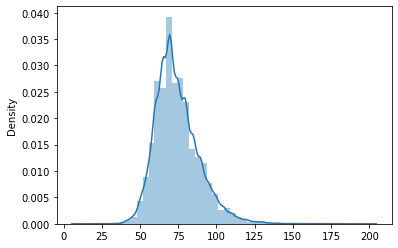

In [18]:
sns.distplot(x=data['weight'])

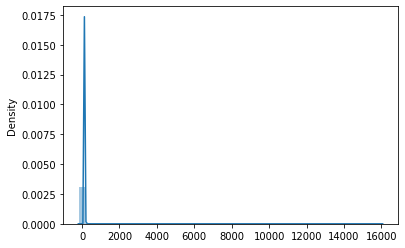

In [19]:
sns.distplot(x=data['ap_hi'])

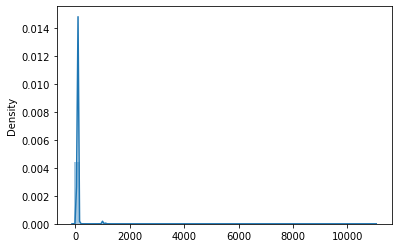

In [20]:
sns.distplot(x=data['ap_lo'])

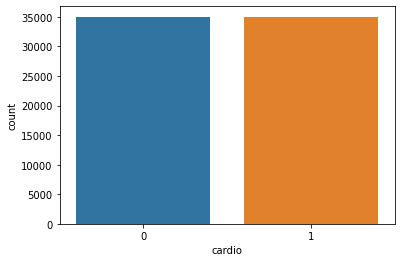

In [21]:
sns.countplot(x=data['cardio'])

This is a balanced dataset since the count of each of the output classes is same.

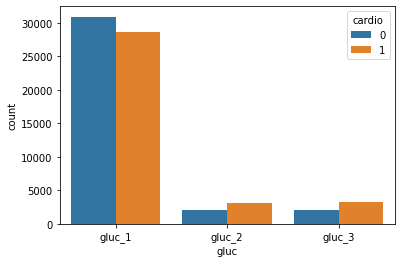

In [22]:
sns.countplot(x=data['gluc'],hue=data['cardio'])

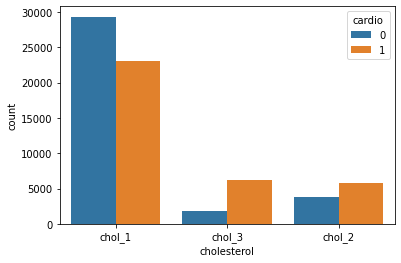

In [23]:
sns.countplot(x=data['cholesterol'],hue=data['cardio'])

We can see that as the levels of glucose and cholestrol are increases, the chances of having cardiovascular disease may increase.

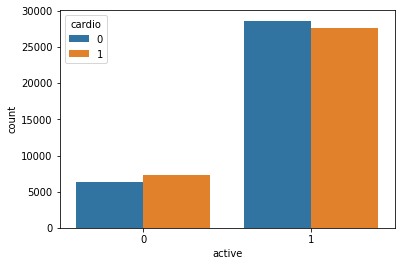

In [24]:
sns.countplot(x=data['active'],hue=data['cardio'])

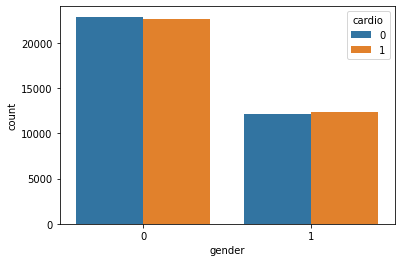

In [25]:
sns.countplot(x=data['gender'],hue=data['cardio'])

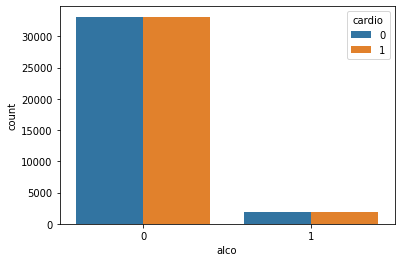

In [26]:
sns.countplot(x=data['alco'],hue=data['cardio'])

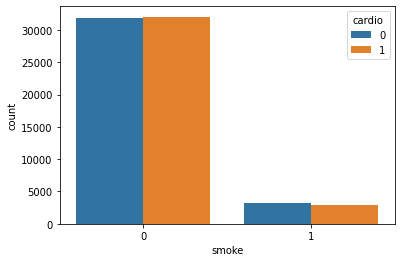

In [27]:
sns.countplot(x=data['smoke'],hue=data['cardio'])

In [28]:
def remove_outliers(arr):
    q1 = np.percentile(arr,25)
    q3 = np.percentile(arr,75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    for i in range(0,len(arr)):
        if arr[i] >= upper_bound or arr[i] <= lower_bound:
            arr[i] = np.nan

In [29]:
remove_outliers(data['ap_hi'])
remove_outliers(data['ap_lo'])
remove_outliers(data['height'])
remove_outliers(data['weight'])

In [30]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168.0,62.0,110.0,80.0,chol_1,gluc_1,0,0,1,0
1,55,0,156.0,85.0,140.0,90.0,chol_3,gluc_1,0,0,1,1
2,51,0,165.0,64.0,130.0,70.0,chol_3,gluc_1,0,0,0,1
3,48,1,169.0,82.0,150.0,100.0,chol_1,gluc_1,0,0,1,1
4,47,0,156.0,56.0,100.0,NaN,chol_1,gluc_1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52,1,168.0,76.0,120.0,80.0,chol_1,gluc_1,1,0,1,0
69996,61,0,158.0,NaN,140.0,90.0,chol_2,gluc_2,0,0,1,1
69997,52,1,183.0,105.0,NaN,90.0,chol_3,gluc_1,0,1,0,1
69998,61,0,163.0,72.0,135.0,80.0,chol_1,gluc_2,0,0,0,1


In [31]:
data = data.dropna()

Dropping the outliers from data.

In [32]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,1,168.0,62.0,110.0,80.0,chol_1,gluc_1,0,0,1,0
1,55,0,156.0,85.0,140.0,90.0,chol_3,gluc_1,0,0,1,1
2,51,0,165.0,64.0,130.0,70.0,chol_3,gluc_1,0,0,0,1
3,48,1,169.0,82.0,150.0,100.0,chol_1,gluc_1,0,0,1,1
5,59,0,151.0,67.0,120.0,80.0,chol_2,gluc_2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53,0,172.0,70.0,130.0,90.0,chol_1,gluc_1,0,0,1,1
69994,57,0,165.0,80.0,150.0,80.0,chol_1,gluc_1,0,0,1,1
69995,52,1,168.0,76.0,120.0,80.0,chol_1,gluc_1,1,0,1,0
69998,61,0,163.0,72.0,135.0,80.0,chol_1,gluc_2,0,0,0,1


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61774 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          61774 non-null  int64  
 1   gender       61774 non-null  int64  
 2   height       61774 non-null  float64
 3   weight       61774 non-null  float64
 4   ap_hi        61774 non-null  float64
 5   ap_lo        61774 non-null  float64
 6   cholesterol  61774 non-null  object 
 7   gluc         61774 non-null  object 
 8   smoke        61774 non-null  int64  
 9   alco         61774 non-null  int64  
 10  active       61774 non-null  int64  
 11  cardio       61774 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.1+ MB


In [34]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio
count,61774.000000,61774.000000,61774.000000,61774.000000,61774.000000,61774.000000,61774.000000,61774.000000,61774.000000,61774.000000
mean,52.861981,0.348836,164.421634,73.158325,126.181727,81.650921,0.086428,0.052012,0.804319,0.491841
std,6.736562,0.476606,7.526350,12.247123,13.692507,7.566292,0.280997,0.222053,0.396727,0.499937
min,29.000000,0.000000,143.000000,40.000000,95.000000,66.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,0.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,1.000000,170.000000,81.000000,140.000000,90.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,1.000000,186.000000,107.000000,169.000000,104.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
Chol = pd.get_dummies(data['cholesterol'])
Gluc = pd.get_dummies(data['gluc'])

data = pd.concat([data,Chol,Gluc],axis=1)

In [36]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3
0,50,1,168.0,62.0,110.0,80.0,chol_1,gluc_1,0,0,1,0,1,0,0,1,0,0
1,55,0,156.0,85.0,140.0,90.0,chol_3,gluc_1,0,0,1,1,0,0,1,1,0,0
2,51,0,165.0,64.0,130.0,70.0,chol_3,gluc_1,0,0,0,1,0,0,1,1,0,0
3,48,1,169.0,82.0,150.0,100.0,chol_1,gluc_1,0,0,1,1,1,0,0,1,0,0
5,59,0,151.0,67.0,120.0,80.0,chol_2,gluc_2,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53,0,172.0,70.0,130.0,90.0,chol_1,gluc_1,0,0,1,1,1,0,0,1,0,0
69994,57,0,165.0,80.0,150.0,80.0,chol_1,gluc_1,0,0,1,1,1,0,0,1,0,0
69995,52,1,168.0,76.0,120.0,80.0,chol_1,gluc_1,1,0,1,0,1,0,0,1,0,0
69998,61,0,163.0,72.0,135.0,80.0,chol_1,gluc_2,0,0,0,1,1,0,0,0,1,0


In [37]:
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3
age,1.000000,-0.032384,-0.095136,0.054864,0.201860,0.144018,-0.048310,-0.028727,-0.011020,0.234675,-0.128985,0.021939,0.151699,-0.085565,0.023754,0.091313
gender,-0.032384,1.000000,0.516486,0.157767,0.038874,0.044120,0.336949,0.168135,0.007254,-0.006025,0.042535,-0.020607,-0.035764,0.022462,-0.005981,-0.024218
height,-0.095136,0.516486,1.000000,0.305845,-0.013329,0.004426,0.191682,0.093786,-0.009240,-0.028703,0.066785,-0.031868,-0.056673,0.030239,-0.019949,-0.021099
weight,0.054864,0.157767,0.305845,1.000000,0.229290,0.209763,0.064031,0.063671,-0.013099,0.159480,-0.122017,0.063008,0.098440,-0.098162,0.080550,0.053224
ap_hi,0.201860,0.038874,-0.013329,0.229290,1.000000,0.704027,0.020540,0.026020,0.003349,0.430715,-0.188817,0.099719,0.149970,-0.091604,0.067016,0.057551
ap_lo,0.144018,0.044120,0.004426,0.209763,0.704027,1.000000,0.019079,0.030530,0.000520,0.331652,-0.151091,0.078563,0.121320,-0.071970,0.057301,0.040721
smoke,-0.048310,0.336949,0.191682,0.064031,0.020540,0.019079,1.000000,0.342285,0.026972,-0.022579,-0.013180,0.023104,-0.006748,0.003430,0.012692,-0.016853
alco,-0.028727,0.168135,0.093786,0.063671,0.026020,0.030530,0.342285,1.000000,0.026411,-0.013166,-0.037952,0.038293,0.010681,-0.012886,0.025635,-0.007575
active,-0.011020,0.007254,-0.009240,-0.013099,0.003349,0.000520,0.026972,0.026411,1.000000,-0.037841,-0.005487,-0.006061,0.013913,0.009234,-0.011020,-0.001679
cardio,0.234675,-0.006025,-0.028703,0.159480,0.430715,0.331652,-0.022579,-0.013166,-0.037841,1.000000,-0.201848,0.077895,0.190935,-0.086230,0.047287,0.069449


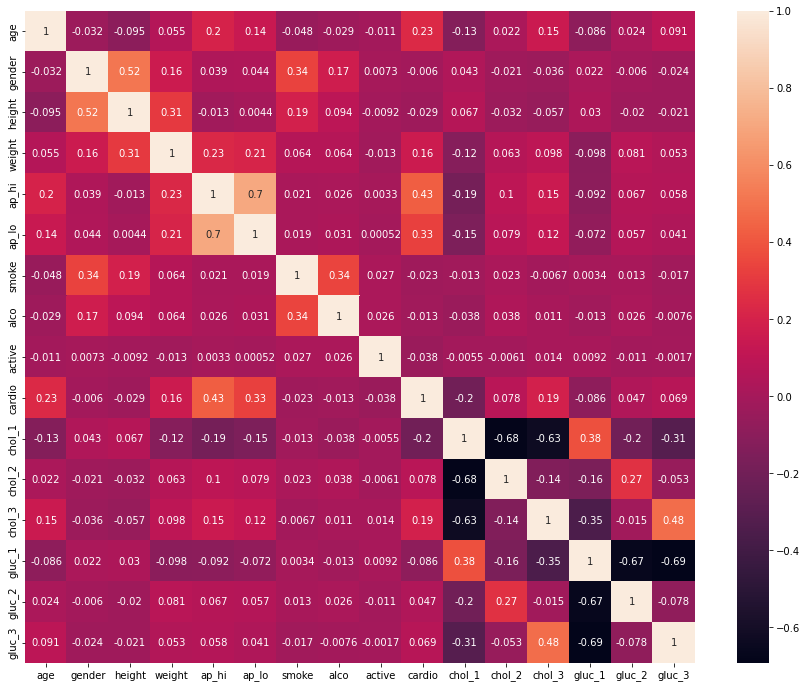

In [38]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)

After the preprocessing, we can clearly see which feature contributes directly and indirectly to the output variable.

1.   Age, weight and level 3 cholesterol contribute **positively** to the output.
2.   Systolic BP and Diastolic BP contribute **very positively** to the output.
3.   Level 1 cholesterol contribute **negatively** to the output.

Rest of the features do not have much effect on the output.

We can also note that each level of cholestrol is highly correlated to the corresponding same level of glucose. This means that if a person has level 3 cholestrol, the chance of hiim/her having level 3 glucose is high.
A similar case can be seen in systolic and diastolic BP which have a very high value of correlation.

Weight is also correlated to systolic and diastolic BP. Thus, if a person's weight increases his/her BP will also increase.

In [39]:
data.drop(['cholesterol','gluc','chol_1','gluc_1'],axis=1,inplace=True)

In [40]:
data

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,chol_2,chol_3,gluc_2,gluc_3
0,50,1,168.0,62.0,110.0,80.0,0,0,1,0,0,0,0,0
1,55,0,156.0,85.0,140.0,90.0,0,0,1,1,0,1,0,0
2,51,0,165.0,64.0,130.0,70.0,0,0,0,1,0,1,0,0
3,48,1,169.0,82.0,150.0,100.0,0,0,1,1,0,0,0,0
5,59,0,151.0,67.0,120.0,80.0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,53,0,172.0,70.0,130.0,90.0,0,0,1,1,0,0,0,0
69994,57,0,165.0,80.0,150.0,80.0,0,0,1,1,0,0,0,0
69995,52,1,168.0,76.0,120.0,80.0,1,0,1,0,0,0,0,0
69998,61,0,163.0,72.0,135.0,80.0,0,0,0,1,0,0,1,0


In [41]:
X = data.drop(['cardio'],axis=1)
y = data['cardio']

In [42]:
X.shape

(61774, 13)

In [43]:
y.shape

(61774,)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

##**MODEL TRAINING AND TESTING**



We are going to train and test our data on 5 model and compare the results:


1.   Logistic Regression Classifier
2.   Random Forest Classifier
3.   Support Vector Machine
4.   XGBoost
5.   K Nearest Neighbors


In [47]:
from sklearn.metrics import confusion_matrix, plot_roc_curve, classification_report
#from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

####*1. LOGISTIC REGRESSION CLASSIFIER*

In [48]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_pred = classifier_lr.predict(X_test)

In [50]:
cm = confusion_matrix(y_test,y_pred)

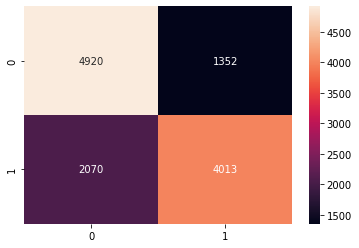

In [51]:
sns.heatmap(cm,annot=True,fmt='0g')

Accuracy = 72.30%

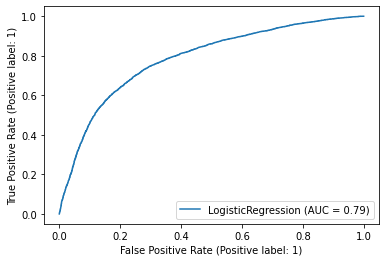

In [52]:
plot_roc_curve(classifier_lr, X_test, y_test)

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6272
           1       0.75      0.66      0.70      6083

    accuracy                           0.72     12355
   macro avg       0.73      0.72      0.72     12355
weighted avg       0.73      0.72      0.72     12355



#### *2. RANDOM FOREST CLASSIFIER*

In [54]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
y_pred = classifier_rf.predict(X_test)

In [56]:
cm = confusion_matrix(y_test,y_pred)

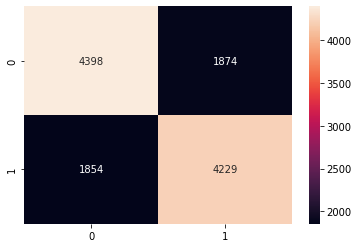

In [57]:
sns.heatmap(cm,annot=True,fmt='0g')

Accuracy = 69.83%

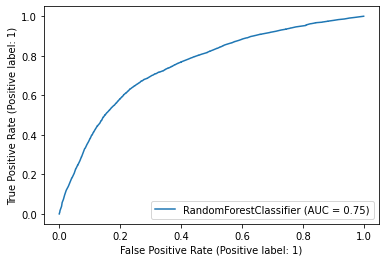

In [58]:
plot_roc_curve(classifier_rf, X_test, y_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      6272
           1       0.69      0.70      0.69      6083

    accuracy                           0.70     12355
   macro avg       0.70      0.70      0.70     12355
weighted avg       0.70      0.70      0.70     12355



####*3. SVM CLASSIFIER*

In [60]:
from sklearn.svm import SVC
classifier_svm = SVC()
classifier_svm.fit(X_train, y_train)

SVC()

In [61]:
y_pred = classifier_svm.predict(X_test)

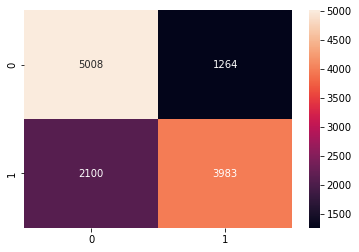

In [62]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='0g')

Accuracy = 72.77%

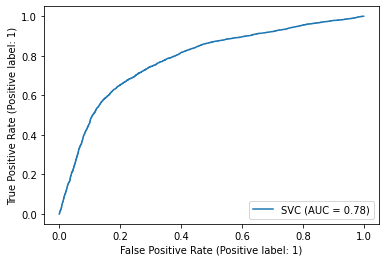

In [63]:
plot_roc_curve(classifier_svm, X_test, y_test)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      6272
           1       0.76      0.65      0.70      6083

    accuracy                           0.73     12355
   macro avg       0.73      0.73      0.73     12355
weighted avg       0.73      0.73      0.73     12355



####*4. XGBOOST CLASSIFIER*

In [65]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(X_train, y_train)

XGBClassifier()

In [66]:
y_pred = classifier_xgb.predict(X_test)

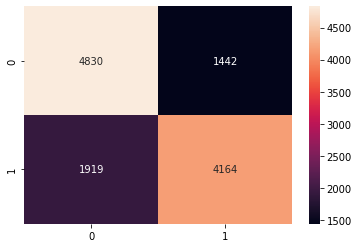

In [67]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='0g')

Accuracy = 72.80%

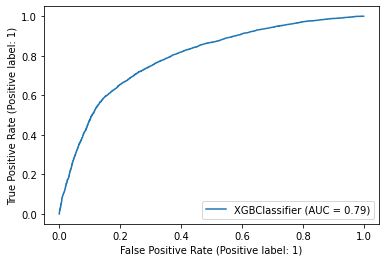

In [68]:
plot_roc_curve(classifier_xgb, X_test, y_test)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6272
           1       0.74      0.68      0.71      6083

    accuracy                           0.73     12355
   macro avg       0.73      0.73      0.73     12355
weighted avg       0.73      0.73      0.73     12355



####*5. KNN CLASSIFIER*

In [70]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier()
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
y_pred = classifier_knn.predict(X_test)

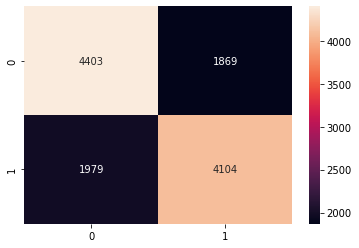

In [72]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='0g')

Accuracy = 68.86%

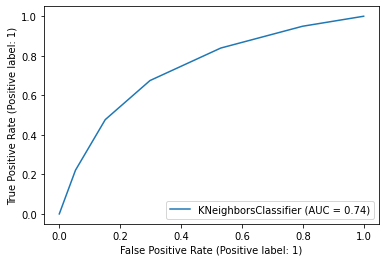

In [73]:
plot_roc_curve(classifier_knn, X_test, y_test)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      6272
           1       0.69      0.67      0.68      6083

    accuracy                           0.69     12355
   macro avg       0.69      0.69      0.69     12355
weighted avg       0.69      0.69      0.69     12355



**In medical classification, our main aim should be to reduce the number of false negative (class 1 recall should be high) because we do not want our model to predict a person who is having the disease (class 1) as no having the disease (class 0).**

The **XGBoost** model outperforms all the other models in terms of accuracy as well as class 1 recall. Thus, we will use XGBoost model for deployment.

*SAVING THE BEST MODEL*

In [75]:
pickle.dump(sc_X, open('/content/drive/MyDrive/Machine Learning Projects/Cardiovascular Disease Prediction/scaler.pkl','wb'))

In [76]:
#pickle.dump(classifier_xgb, open('/content/drive/MyDrive/Machine Learning Projects/Cardiovascular Disease Prediction/model.pkl','wb'))

In [77]:
import xgboost as xgb

classifier_xgb.save_model('/content/drive/MyDrive/Machine Learning Projects/Cardiovascular Disease Prediction/xgb_model.bin')

The version of XGBoost on Google Colab is 0.90 and the version on my laptop is 
1.3.3 that is why I was unable to load the model using pickle.

Also, XGBoost version 0.90 does not support json file so I had to save my model with .bin extension.